In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

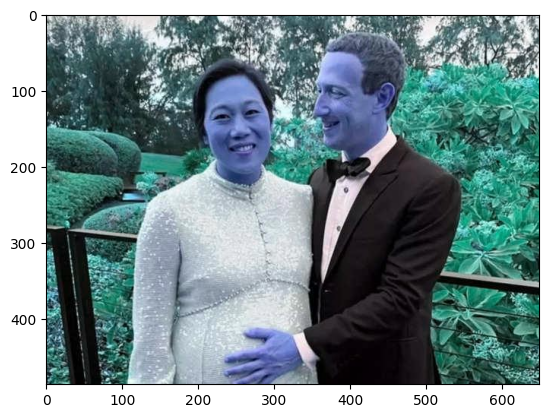

In [3]:
img=cv2.imread(r"C:\Users\chetr\OneDrive\Desktop\famous_ceos\test_images\mark_zuckerberg6.jpg")


plt.imshow(img)

In [4]:
img.shape

(487, 650, 3)

In [5]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(487, 650)

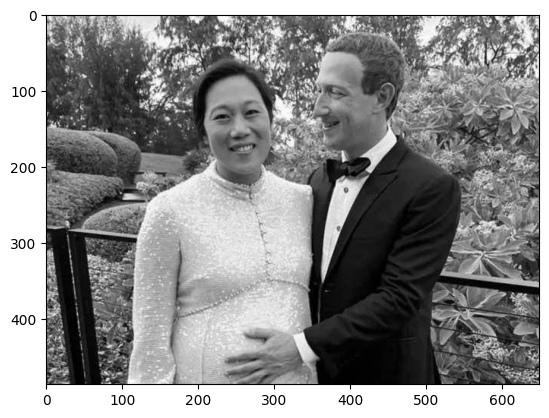

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\chetr\OneDrive\Desktop\famous_ceos\opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\chetr\OneDrive\Desktop\famous_ceos\opencv\haarcascades\haarcascade_eye.xml")

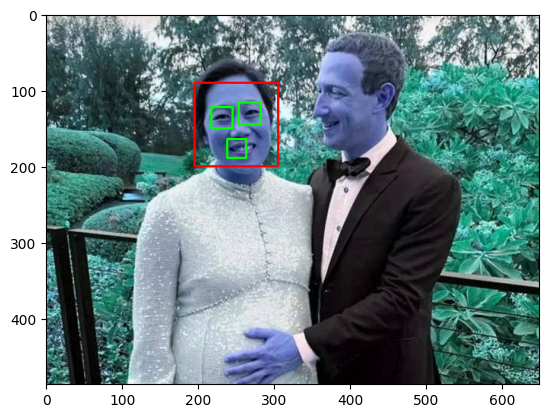

In [8]:
faces = face_cascade.detectMultiScale(gray, 1.1, 5)


for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color=(img[y:y+h, x:x+w])
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.imshow(img,cmap='gray')

cv2.destroyAllWindows()

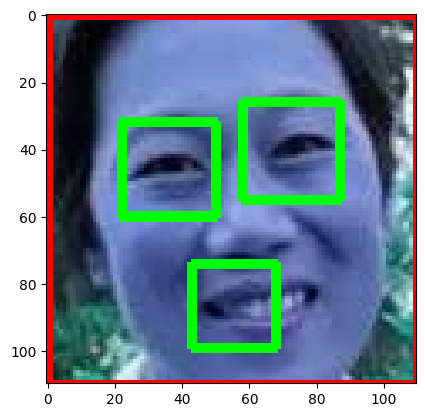

In [9]:

plt.imshow(roi_color,cmap='gray')
plt.show()

In [10]:

def cropped_image_if_two_eyes(image_path):
    img=cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(image_path)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:

        roi_gray = gray[y:y+h, x:x+w]
        if img is None:
          continue

        roi_color=(img[y:y+h, x:x+w])
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if(len(faces)>=1):
            return (roi_color)



C:\Users\chetr\OneDrive\Desktop\famous_ceos\test_images\sundar_pichai28.jpg


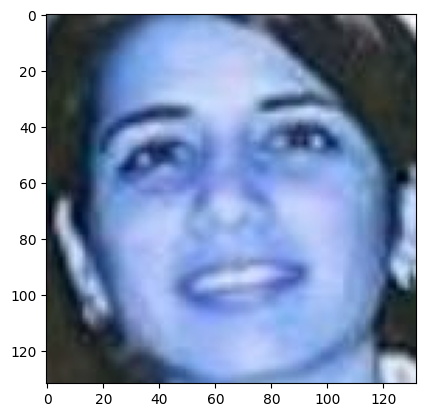

In [11]:
path=r"C:\Users\chetr\OneDrive\Desktop\famous_ceos\test_images\sundar_pichai28.jpg"
new_img=cv2.imread(path)
new_img=cropped_image_if_two_eyes(path)
new_img


plt.imshow(new_img)
plt.show()

In [12]:
path_to_data=r"C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset"
path_crop_data=r"C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\cropped"
img_dir=[]
import os
for directory in os.scandir(path_to_data):
    if directory.is_dir():
        img_dir.append(directory.path)


img_dir

['C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\cropped',
 'C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\elon_musk',
 'C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\mark_zuckerberg',
 'C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\satya_nadella',
 'C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\sundar_pichai',
 'C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\warren_buffet']

In [13]:
import shutil
if os.path.exists(path_crop_data):
  shutil.rmtree(path_crop_data)
os.mkdir(path_crop_data)


In [14]:
cropped_image_dir=[]
ceo_name_dir={}
for img in img_dir:
    count=1
    ceo_name=img.split('\\')[-1]
    ceo_name_dir[ceo_name]=[]
    for entry in os.scandir(img):
        if cropped_image_if_two_eyes(entry.path) is not None:
            print(entry.path)
            cropped_folder=path_crop_data+'\\'+ceo_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dir.append(cropped_folder)
            cropped_file_path=cropped_folder+"\\"+ceo_name+str(count)+".png"
            if(entry.path in cropped_folder):
              continue
            cv2.imwrite(cropped_file_path,cropped_image_if_two_eyes(entry.path))
            ceo_name_dir[ceo_name].append(cropped_file_path)
            count+=1




C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk0.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk0.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk0.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk1.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk1.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk1.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk10.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk10.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk10.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk11.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk11.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk11.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_mus

C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk49.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk49.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk49.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk5.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk5.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk5.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk50.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk50.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk50.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk51.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk51.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk51.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_

C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg30.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg30.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg31.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg31.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg31.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg32.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg32.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg32.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg33.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg33.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg33.jpg
C:\Users\c

C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg60.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg60.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg7.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg7.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg7.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg8.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg8.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg8.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg9.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg9.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\mark_zuckerberg\mark_zuckerberg9.jpg
C:\Users\chetr\OneD

C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella50.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella50.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella50.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella51.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella52.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella53.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella53.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella53.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella54.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella55.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\satya_nadella\satya_nadella56.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sa

C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai33.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai33.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai34.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai34.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai34.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai35.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai35.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai35.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai36.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai36.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\sundar_pichai\sundar_pichai36.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\su

C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet19.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet2.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet2.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet2.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet20.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet20.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet20.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet21.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet21.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet21.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet22.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warre

C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet57.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet57.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet58.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet58.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet58.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet59.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet6.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet6.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet6.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet7.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_buffet\warren_buffet8.jpg
C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\warren_

## Using feature engineering (wavelet tranform to get some importanr features)



In [15]:
!pip install PyWavelets
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [16]:
img_path=r"C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\elon_musk\elon_musk0.jpg"
img=cv2.imread(img_path)


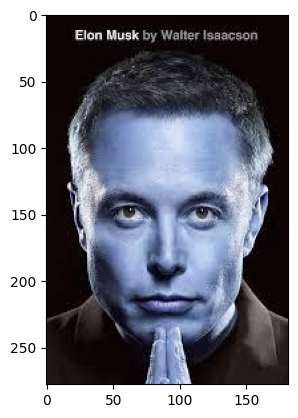

In [17]:
plt.imshow(img)

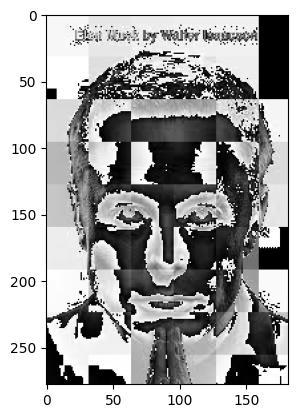

In [18]:
img= w2d(img,'db1',5)
plt.imshow(img,cmap="gray")

In [19]:
ceo_name_dir.keys()
class_dict={
   name:count for count,name in enumerate(ceo_name_dir.keys())
}

i=0
class_dict.pop('cropped')
for key in class_dict.keys():
    class_dict[key]=i
    i+=1
class_dict

{'elon_musk': 0,
 'mark_zuckerberg': 1,
 'satya_nadella': 2,
 'sundar_pichai': 3,
 'warren_buffet': 4}

In [20]:
path_to_data=r"C:\Users\chetr\OneDrive\Desktop\famous_ceos\Dataset\cropped"
img_dir=[]
import os
for directory in os.scandir(path_to_data):
    if directory.is_dir():
        img_dir.append(directory.path)
img_dir

['C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\cropped\\elon_musk',
 'C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\cropped\\mark_zuckerberg',
 'C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\cropped\\satya_nadella',
 'C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\cropped\\sundar_pichai',
 'C:\\Users\\chetr\\OneDrive\\Desktop\\famous_ceos\\Dataset\\cropped\\warren_buffet']

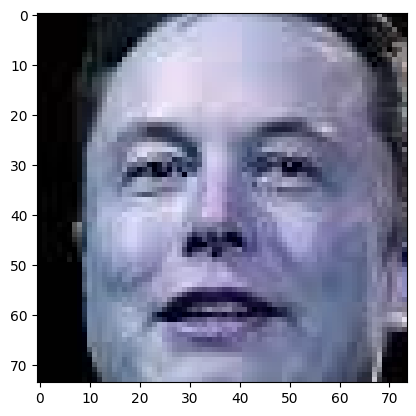

In [21]:
cropped_image_dir=[]
ceo_name_dir={}
for img in img_dir:

    ceo_name=img.split('\\')[-1]
    ceo_name_dir[ceo_name]=[]
    for entry in os.scandir(img):
            ceo_name_dir[ceo_name].append(entry.path)
import cv2
img=cv2.imread(ceo_name_dir["elon_musk"][1])
plt.imshow(img)

In [22]:
from keras.layers import Dense,Input,Lambda,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array
from keras.models import Sequential,Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [23]:
X=[]
y=[]
for ceo_name,training_files in ceo_name_dir.items():
    for training_img in training_files:
        img=cv2.imread(training_img)
        if img is None:
            continue
        scaled_img=cv2.resize(img,(224,224))

        scaled_img=scaled_img/255.0
        X.append(scaled_img)
        y.append(class_dict[ceo_name])
X=np.array(X)
y=np.array(y)
X[0].shape

(224, 224, 3)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
import pandas as pd

In [25]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False



  # useful for getting number of classes



# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
print(vgg.input)
# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model

r = model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=5,
  steps_per_epoch=len(X_train),
  validation_steps=len(X_test)
)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112,

In [26]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array
# datagen=ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     fill_mode="nearest",
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )
# ceo_dir={}
# for path in img_dir:
#    ceo_name=(path).split('/')[-1]
#    ceo_dir[ceo_name]=path
# for ceo_name,training_files in ceo_name_dir.items():
#     for training_img in training_files:
#         img=load_img(training_img)
#         x=img_to_array(img)
#         x=x.reshape((1,)+x.shape)
#         x.shape
#         i=0
#         for batch in datagen.flow(x,batch_size=1,save_to_dir=ceo_dir[celebrity_name],save_format=".jpeg"):
#             i+=1
#             if(i>=20):
#                 break

C:\Users\chetr\.conda\envs\venvdl\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


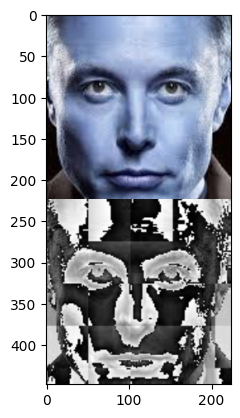

In [27]:
X=[]
y=[]
for ceo_name,training_files in ceo_name_dir.items():
    for training_img in training_files:
        img=cv2.imread(training_img)
        if img is None:
            continue
        scaled_img=cv2.resize(img,(224,224))
        img_har=w2d(img,'db1',5)
        scaled_image_har=cv2.resize(img_har,(224,224))
        scaled_img = scaled_img.reshape(224, 224, 3)  # Reshape scaled_img to (224, 224, 3)
        scaled_image_har = scaled_image_har.reshape(224, 224, 1)
        scaled_image_har = np.repeat(scaled_image_har, 3, axis=2)
        # Reshape scaled_image_har to (224, 224, 1)
        combined_img = np.vstack((scaled_img, scaled_image_har))
        X.append(combined_img)
        y.append(class_dict[ceo_name])
X=np.array(X)
y=np.array(y)
X[0].shape

plt.imshow(X[0])

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
def build_model(hp):
  model=keras.models.Sequential([
      keras.layers.Conv2D(
          filters=hp.Int("conv_1_layer",min_value=32,max_value=128,step=16),
          kernel_size=hp.Choice("con_1_kernel",values=[3,5]),
          activation='relu',
          input_shape=(448,224,3)
      ),
      keras.layers.Conv2D(
          filters=hp.Int("conv_2_layer",min_value=64,max_value=128,step=16),
          kernel_size=hp.Choice("con_2_kernel",values=[3,5]),
          activation='relu'
      ) ,
      keras.layers.Conv2D(
          filters=hp.Int("conv_3_layer",min_value=64,max_value=128,step=16),
          kernel_size=hp.Choice("con_3_kernel",values=[3,5]),
          activation='relu'
      ) ,
      keras.layers.Flatten(),
      keras.layers.Dense(
          units=hp.Int("Dense_1_layer",min_value=32,max_value=128,step=16),
          activation="relu"
      ),
      keras.layers.Dense(5,activation="softmax")
      ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate",values=[1e-2,1e-3])),loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  return model

In [30]:
!pip3 install keras-tuner
from kerastuner import RandomSearch
from kerastuner import HyperParameters


C:\Users\chetr\AppData\Local\Temp\ipykernel_4380\3749234648.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [31]:
import keras
tuner_search=RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    directory="cnn",
    project_name="fashion_mnist"
)


In [ ]:
tuner_search.search(X_train,y_train,epochs=6,validation_split=0.2)

Trial 1 Complete [00h 34m 57s]
val_accuracy: 0.34285715222358704

Best val_accuracy So Far: 0.34285715222358704
Total elapsed time: 00h 34m 57s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
96                |32                |conv_1_layer
3                 |3                 |con_1_kernel
112               |64                |conv_2_layer
3                 |3                 |con_2_kernel
112               |64                |conv_3_layer
5                 |5                 |con_3_kernel
80                |96                |Dense_1_layer
0.001             |0.001             |learning_rate

Epoch 1/6
1/5 [=====>........................] - ETA: 15:46 - loss: 17.1095 - accuracy: 0.0938

In [ ]:
model=tuner_search.get_best_models(num_models=4)[0]